In [1]:
import pandas as pd

# Load the CSV file
file_path = 'e:/Abner/Downloads/velocidade_fenix.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()


,Tempo (s),RPM
0,1.012523,0.0
1,2.014193,0.0
2,3.018172,0.0
3,4.022515,0.0
4,5.026829,0.0


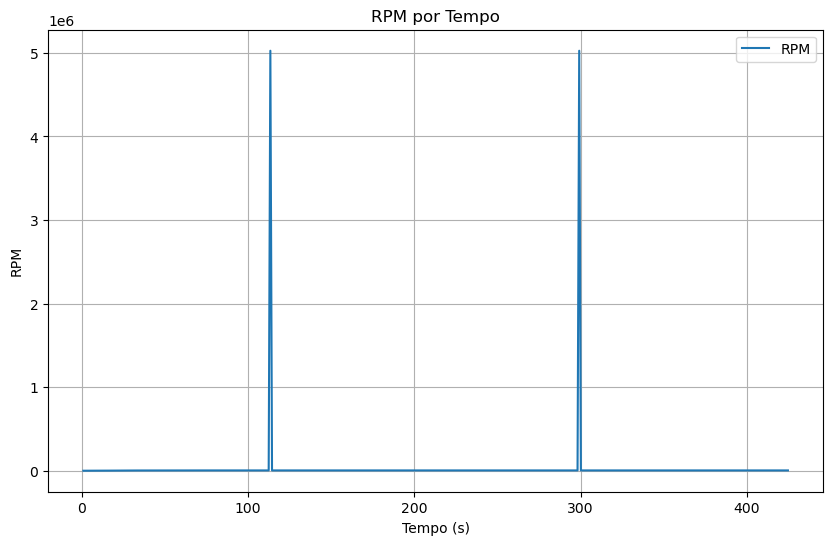

In [2]:
import matplotlib.pyplot as plt

# Dados
tempo = data['Tempo (s)']
rpm = data['RPM']

# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(tempo, rpm, label='RPM')
plt.xlabel('Tempo (s)')
plt.ylabel('RPM')
plt.title('RPM por Tempo')
plt.legend()
plt.grid(True)
plt.show()

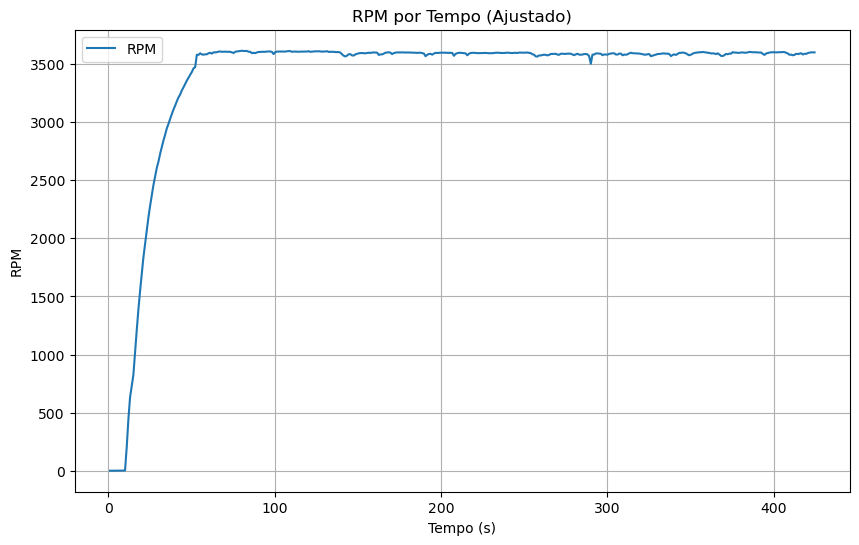

In [3]:
# Filtrando valores de RPM irrealisticamente altos
filtered_data = data[data['RPM'] < 6000]

# Dados filtrados
tempo_filtrado = filtered_data['Tempo (s)']
rpm_filtrado = filtered_data['RPM']

# Plotando o gráfico ajustado
plt.figure(figsize=(10, 6))
plt.plot(tempo_filtrado, rpm_filtrado, label='RPM')
plt.xlabel('Tempo (s)')
plt.ylabel('RPM')
plt.title('RPM por Tempo (Ajustado)')
plt.legend()
plt.grid(True)
plt.show()


Ganho Estático (K): 3595.089523809524
Constante de Tempo (τ): 25.107571363449097


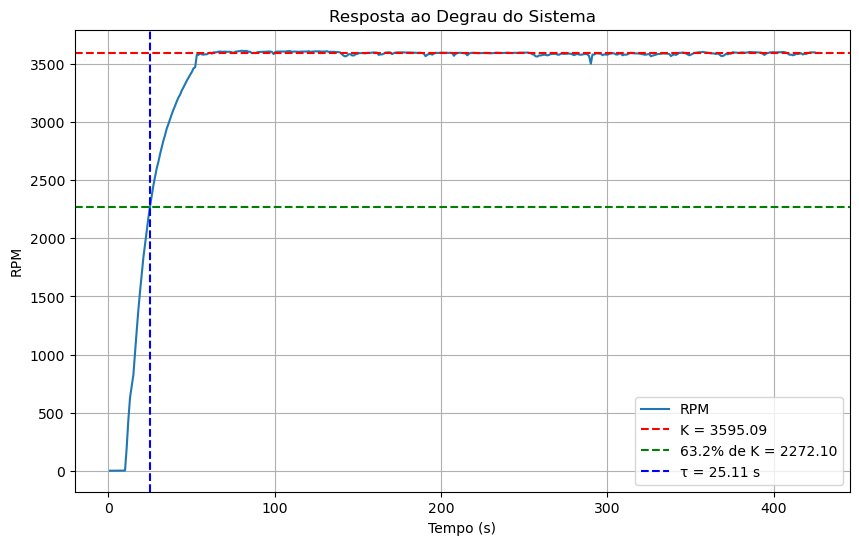

Função de Transferência de Primeira Ordem: G(s) = 3595.09 / (25.11 s + 1)


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
data

# Filtrar valores de RPM irrealisticamente altos
filtered_data = data[data['RPM'] < 6000]

# Dados filtrados
tempo_filtrado = filtered_data['Tempo (s)'].values
rpm_filtrado = filtered_data['RPM'].values

# Determinar o valor final de RPM (assumindo que é o valor médio dos últimos 10% dos dados)
K = np.mean(rpm_filtrado[int(len(rpm_filtrado) * 0.9):])

# Determinar o valor de 63.2% do valor final
target_value = 0.632 * K

# Encontrar o tempo correspondente a 63.2% do valor final
tau_index = np.where(rpm_filtrado >= target_value)[0][0]
tau = tempo_filtrado[tau_index]

# Mostrar os valores calculados
print(f"Ganho Estático (K): {K}")
print(f"Constante de Tempo (τ): {tau}")

# Plotar a resposta ao degrau para verificar visualmente os parâmetros
plt.figure(figsize=(10, 6))
plt.plot(tempo_filtrado, rpm_filtrado, label='RPM')
plt.axhline(y=K, color='r', linestyle='--', label=f'K = {K:.2f}')
plt.axhline(y=target_value, color='g', linestyle='--', label=f'63.2% de K = {target_value:.2f}')
plt.axvline(x=tau, color='b', linestyle='--', label=f'τ = {tau:.2f} s')
plt.xlabel('Tempo (s)')
plt.ylabel('RPM')
plt.title('Resposta ao Degrau do Sistema')
plt.legend()
plt.grid(True)
plt.show()

# Função de transferência de primeira ordem
print(f"Função de Transferência de Primeira Ordem: G(s) = {K:.2f} / ({tau:.2f} s + 1)")


Ganho Estático (K): 3595.089523809524
Constante de Tempo (τ): 25.107571363449097


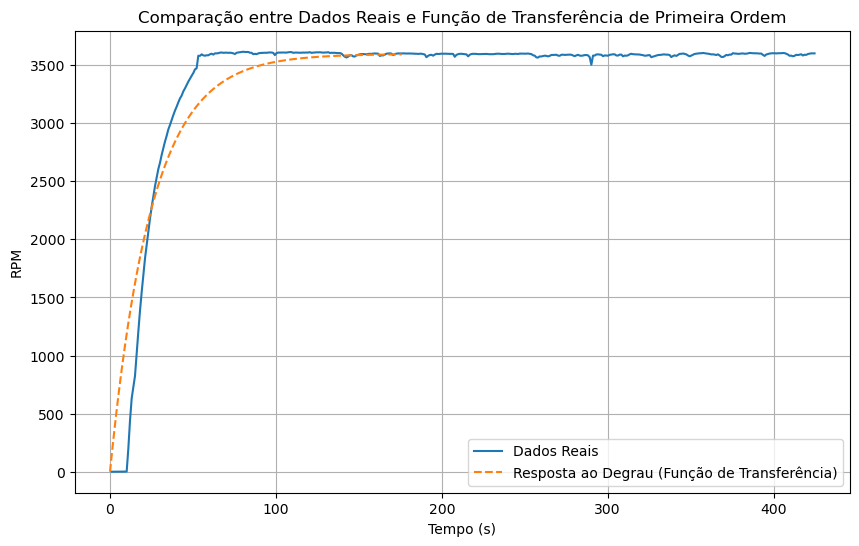

Função de Transferência de Primeira Ordem: G(s) = 3595.09 / (25.11 s + 1)


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal


# Filtrar valores de RPM irrealisticamente altos
filtered_data = data[data['RPM'] < 6000]

# Dados filtrados
tempo_filtrado = filtered_data['Tempo (s)'].values
rpm_filtrado = filtered_data['RPM'].values

# Determinar o valor final de RPM (assumindo que é o valor médio dos últimos 10% dos dados)
K = np.mean(rpm_filtrado[int(len(rpm_filtrado) * 0.9):])

# Determinar o valor de 63.2% do valor final
target_value = 0.632 * K

# Encontrar o tempo correspondente a 63.2% do valor final
tau_index = np.where(rpm_filtrado >= target_value)[0][0]
tau = tempo_filtrado[tau_index]

# Mostrar os valores calculados
print(f"Ganho Estático (K): {K}")
print(f"Constante de Tempo (τ): {tau}")

# Definindo a função de transferência
num = [K]
den = [tau, 1]
system = signal.TransferFunction(num, den)

# Gerando a resposta ao degrau para a função de transferência
t, y = signal.step(system)

# Plotando a resposta ao degrau da função de transferência e os dados reais
plt.figure(figsize=(10, 6))
plt.plot(tempo_filtrado, rpm_filtrado, label='Dados Reais')
plt.plot(t, y, label='Resposta ao Degrau (Função de Transferência)', linestyle='--')
plt.xlabel('Tempo (s)')
plt.ylabel('RPM')
plt.title('Comparação entre Dados Reais e Função de Transferência de Primeira Ordem')
plt.legend()
plt.grid(True)
plt.show()

# Função de transferência de primeira ordem
print(f"Função de Transferência de Primeira Ordem: G(s) = {K:.2f} / ({tau:.2f} s + 1)")


Ganho Estático (K): 3595.089523809524
Constante de Tempo (τ): 25.107571363449097
Ganho Estático (K): 3606.6914385382893
Frequência Natural (ωₙ): 0.08189079980658616


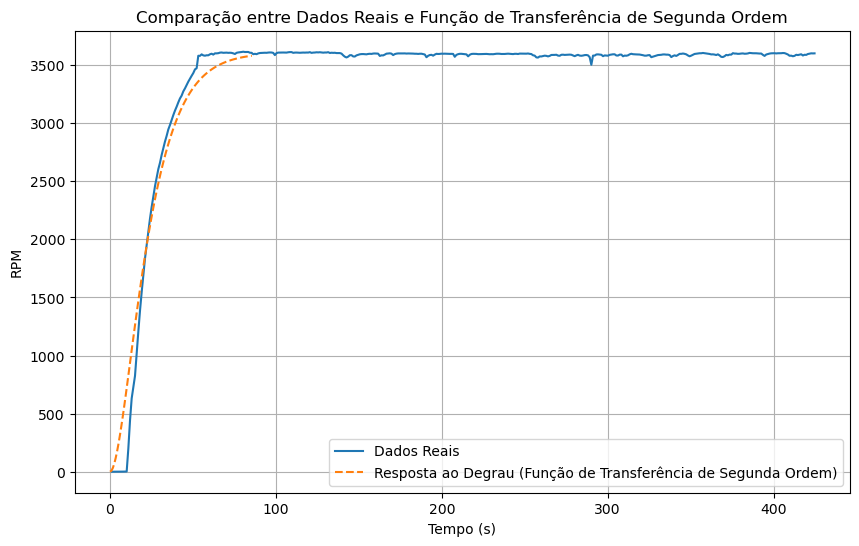

Função de Transferência de Segunda Ordem: G(s) = 3606.69 / (s^2 + 0.16s + 0.01)


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from scipy.optimize import curve_fit



# Filtrar valores de RPM irrealisticamente altos
filtered_data = data[data['RPM'] < 6000]

# Dados filtrados
tempo_filtrado = filtered_data['Tempo (s)'].values
rpm_filtrado = filtered_data['RPM'].values

# Determinar o valor final de RPM (assumindo que é o valor médio dos últimos 10% dos dados)
K = np.mean(rpm_filtrado[int(len(rpm_filtrado) * 0.9):])

# Determinar o valor de 63.2% do valor final
target_value = 0.632 * K

# Encontrar o tempo correspondente a 63.2% do valor final
tau_index = np.where(rpm_filtrado >= target_value)[0][0]
tau = tempo_filtrado[tau_index]

# Mostrar os valores calculados
print(f"Ganho Estático (K): {K}")
print(f"Constante de Tempo (τ): {tau}")

# Função de transferência de segunda ordem para o caso criticamente amortecido
def second_order_critically_damped(t, K, omega_n):
    return K * (1 - (1 + omega_n * t) * np.exp(-omega_n * t))

# Ajuste dos parâmetros do sistema de segunda ordem
popt, _ = curve_fit(second_order_critically_damped, tempo_filtrado, rpm_filtrado, p0=[K, 1])

K_second_order, omega_n = popt

# Mostrar os valores calculados
print(f"Ganho Estático (K): {K_second_order}")
print(f"Frequência Natural (ωₙ): {omega_n}")

# Função de transferência de segunda ordem para o caso criticamente amortecido
num_second_order = [K_second_order * omega_n**2]
den_second_order = [1, 2 * omega_n, omega_n**2]
system_second_order = signal.TransferFunction(num_second_order, den_second_order)

# Gerando a resposta ao degrau para a função de transferência de segunda ordem
t_second_order, y_second_order = signal.step(system_second_order)

# Plotando a resposta ao degrau da função de transferência de segunda ordem e os dados reais
plt.figure(figsize=(10, 6))
plt.plot(tempo_filtrado, rpm_filtrado, label='Dados Reais')
plt.plot(t_second_order, y_second_order, label='Resposta ao Degrau (Função de Transferência de Segunda Ordem)', linestyle='--')
plt.xlabel('Tempo (s)')
plt.ylabel('RPM')
plt.title('Comparação entre Dados Reais e Função de Transferência de Segunda Ordem')
plt.legend()
plt.grid(True)
plt.show()

# Função de transferência de segunda ordem
print(f"Função de Transferência de Segunda Ordem: G(s) = {K_second_order:.2f} / (s^2 + {2*omega_n:.2f}s + {omega_n**2:.2f})")
